<a href="https://colab.research.google.com/github/kranjeet-da/ml/blob/main/SpaData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/SpaData.csv")

In [ ]:
df.head(30)

,ID,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,6/2/2015 8:51,20.840000,19.745000,433.000000,629.750000,0.003000,1
1,6419,9/2/2015 4:49,19.290000,26.890000,0.000000,466.000000,0.003716,0
2,3330,7/2/2015 1:20,20.000000,18.700000,0.000000,435.500000,0.002696,0
3,7188,9/2/2015 17:38,22.200000,38.433333,429.500000,1943.500000,0.006381,1
4,7655,10/2/2015 1:25,20.245000,32.900000,0.000000,469.000000,0.004833,0
5,371,5/2/2015 0:01,21.245000,25.245000,0.000000,458.500000,0.003938,0
6,4298,7/2/2015 17:28,20.500000,21.245000,0.000000,439.500000,0.003162,0
7,7261,9/2/2015 18:51,21.290000,36.450000,0.000000,1381.500000,0.005718,0
8,4486,7/2/2015 20:36,20.000000,25.700000,0.000000,439.500000,0.003712,0
9,3715,7/2/2015 7:45,19.700000,19.390000,0.000000,445.000000,0.002744,0


In [ ]:
df['ID'].isnull().count()

6514

In [ ]:
df['ID'].notnull().count()

6514

In [ ]:
# df.isnull()

In [ ]:
df.shape

(6514, 8)

In [ ]:
df = df.drop(["TimeStamp"], axis=1)

In [ ]:
df.shape

(6514, 7)

In [ ]:
df.head()

,ID,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,20.840,19.745000,433.0,629.75,0.003000,1
1,6419,19.290,26.890000,0.0,466.00,0.003716,0
2,3330,20.000,18.700000,0.0,435.50,0.002696,0
3,7188,22.200,38.433333,429.5,1943.50,0.006381,1
4,7655,20.245,32.900000,0.0,469.00,0.004833,0


In [ ]:
X = df.drop("GTOccupancy", axis=1).values
y = df["GTOccupancy"].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

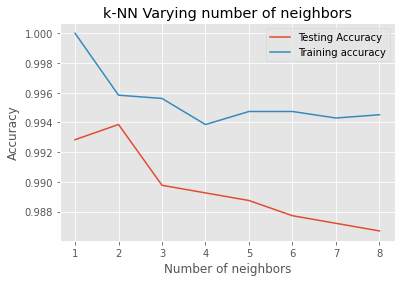

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.9938618925831202

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1557,    4],
       [   8,  386]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1557,4,1561
1,8,386,394
All,1565,390,1955


In [ ]:
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1561
           1       0.99      0.98      0.98       394

    accuracy                           0.99      1955
   macro avg       0.99      0.99      0.99      1955
weighted avg       0.99      0.99      0.99      1955



In [ ]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

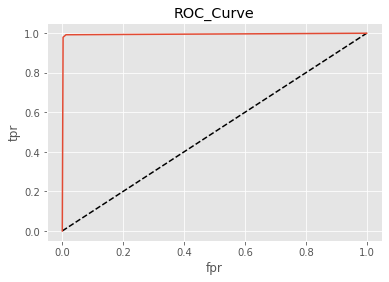

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC_Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(roc_auc_score(y_test, y_pred_prob))

0.9947978485742253


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 10)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

0.9930916837311509

In [ ]:
knn_cv.best_params_

{'n_neighbors': 7}

Logistic Regression

In [ ]:
# %% normalization
# X = (X -np.min(X))/(np.max(X)-np.min(X))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logReg.predict(x_test)

In [ ]:
print('Accuracy of logistic Regression {:.4f}'.format(logReg.score(x_test, y_test)))

Accuracy of logistic Regression 0.9841


In [ ]:
from sklearn.metrics import confusion_matrix
confuss_Matric = confusion_matrix(y_test,y_pred)

In [ ]:
print(confuss_Matric)

[[1531   30]
 [   1  393]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1532
           1       1.00      0.93      0.96       423

    accuracy                           0.98      1955
   macro avg       0.99      0.96      0.98      1955
weighted avg       0.98      0.98      0.98      1955



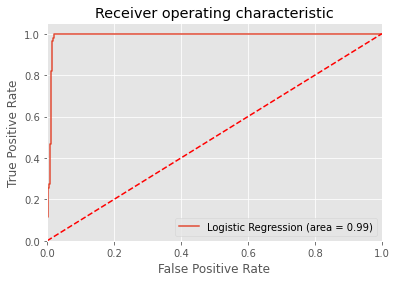

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
logReg = LogisticRegression()

In [ ]:
param_grid = [
              {
                  'penalty':['l1','l2','elasticnet', 'none'],
               'C':np.logspace(-4,4,20),
               'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
               'max_iter':[100,1000,2500,5000]
              }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf=GridSearchCV(logReg,param_grid=param_grid,cv=3, verbose=True, n_jobs=-1)

In [ ]:
best_clf=clf.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 902 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2403 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4709 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 15.4min finished


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.004832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Accuracy of logistic Regression {:.4f}'.format(best_clf.score(x_test, y_test)))

Accuracy of logistic Regression 0.9841


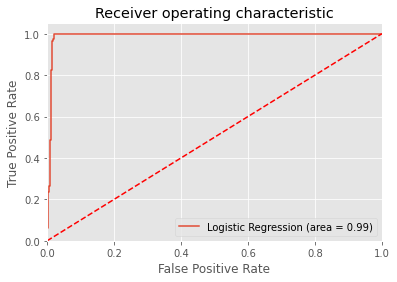

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, best_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
y_pred = best_clf.predict(x_test)

In [ ]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1532
           1       1.00      0.93      0.96       423

    accuracy                           0.98      1955
   macro avg       0.99      0.96      0.98      1955
weighted avg       0.98      0.98      0.98      1955



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
clf.score(x_test, y_test)

0.991304347826087